In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from generate_data import run_metro_2

In [2]:
m = 10000
n = 100
SNR = 1000
TIs = [200, 350, 416, 450, 500, 650, 750, 832, 1000]
N_PLOTS = 3
N_PARAMS = 4

assert N_PLOTS <= n

In [3]:
# USED TO GENERATE THE DATA , NOT NEEDED IF USING SAVED DATA

datas = np.zeros((len(TIs), n, m, N_PARAMS))
for i, TI in tqdm(enumerate(TIs), total = len(TIs)):
    for j in range(n):
        data = run_metro_2(TI, m, SNR, verbose = False)
        datas[i, j] = data
        
combined_datas = datas.reshape((len(TIs), n*m, N_PARAMS))

data_1m = np.zeros((len(TIs), n*m, N_PARAMS))
for i, TI in tqdm(enumerate(TIs), total = len(TIs)):
    data_1m[i] = run_metro_2(TI, n*m, SNR, verbose = False)

np.save("results/datas_pc_final.npy", datas)
np.save("results/combined_datas_pc_final.npy", combined_datas)
np.save("results/data_pc_1m_final.npy", data_1m)

 11%|█         | 1/9 [00:25<03:27, 25.92s/it]c:\Users\Lanceiv\Documents\GEMS\repo\Metropolis.py:62: RuntimeWarning: overflow encountered in square
  residual = (data-model)**2
c:\Users\Lanceiv\Documents\GEMS\repo\Metropolis.py:49: RuntimeWarning: overflow encountered in exp
  model = d1*np.exp(-TE/T21)+d2*np.exp(-TE/T22)
c:\Users\Lanceiv\Documents\GEMS\repo\Metropolis.py:63: RuntimeWarning: overflow encountered in scalar multiply
  return np.exp(1/(n_TE)*-(1/(2*sd**2))*residual.sum())
100%|██████████| 9/9 [05:40<00:00, 37.87s/it]


In [4]:
datas = np.load("results/datas_pc_final.npy")
combined_datas = np.load("results/combined_datas_pc_final.npy")
data_1m = np.load("results/data_pc_1m_final.npy")

In [5]:
def create_huge_figure(fileName = None, dpi = 100, upper_bound = 300, small_point = 0.1, axes_range = range(0, 350, 100)):
    # len(TIs) by N_PLOTS + 1 subplots
    fig, axs = plt.subplots(len(TIs), N_PLOTS + 2, figsize = (15, 25))
    fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

    for i in range(N_PLOTS):
        axs[0, i].set_title("Bayesian\n(n, m) = (1, 10000)", fontsize = 10, y = 1.3)
    axs[0, N_PLOTS].set_title("Bayesian\n(n, m) = (1, 1000000)", fontsize = 10, y = 1.3)
    axs[0, N_PLOTS+1].set_title("Bayesian\n(n, m) = (100, 10000)", fontsize = 10, y = 1.3)


    for i in range(len(TIs)):
        plt.text(-0.5, 0.5, f"TI = {TIs[i]}", fontsize = 12, rotation = 90, ha = 'center', va = 'center', transform = axs[i, 0].transAxes)

        for j in range(N_PLOTS):
            data = datas[i, j]
            axs[i, j].scatter(data[:,2], data[:,3], s = 1, alpha = 0.05)

        # m = 1,000,000, n = 1
        data_1m_TI = data_1m[i]
        axs[i, N_PLOTS].scatter(data_1m_TI[:,2], data_1m_TI[:,3], alpha = 0.03, s = small_point)


        # m = 10,000, n = 100
        combined_data = combined_datas[i]
        axs[i, N_PLOTS+1].scatter(combined_data[:,2], combined_data[:,3], alpha = 0.03, s = small_point)

        for j in range(N_PLOTS + 2):
            ax = axs[i, j]
            
            ax.set_xlim(0, upper_bound)
            ax.set_ylim(0, upper_bound)

            # ax.axline((0, 0), slope = 1, alpha = 0.5, c = "gray")
            
            if i == j == 0:
                ax.set_xlabel(r"$T_{2a}$", rotation = 0, fontsize = 11)
                ax.set_ylabel(r"$T_{2b}$", rotation = 0, fontsize = 11)

                ax.xaxis.set_label_coords(0.5, -0.1)
                ax.yaxis.set_label_coords(-0.1, 0.45)

                ax.set_xticks(axes_range, axes_range, fontsize = 10)
                ax.set_yticks(axes_range, axes_range, fontsize = 10)

                pos = ax.get_position()
                new_pos = [pos.x0, pos.y0, pos.width, pos.height]
                ax.set_position(new_pos)


            else:
                ax.set_xticks(axes_range, [])
                ax.set_yticks(axes_range, [])



    if fileName:
        plt.savefig(fileName, dpi = dpi)


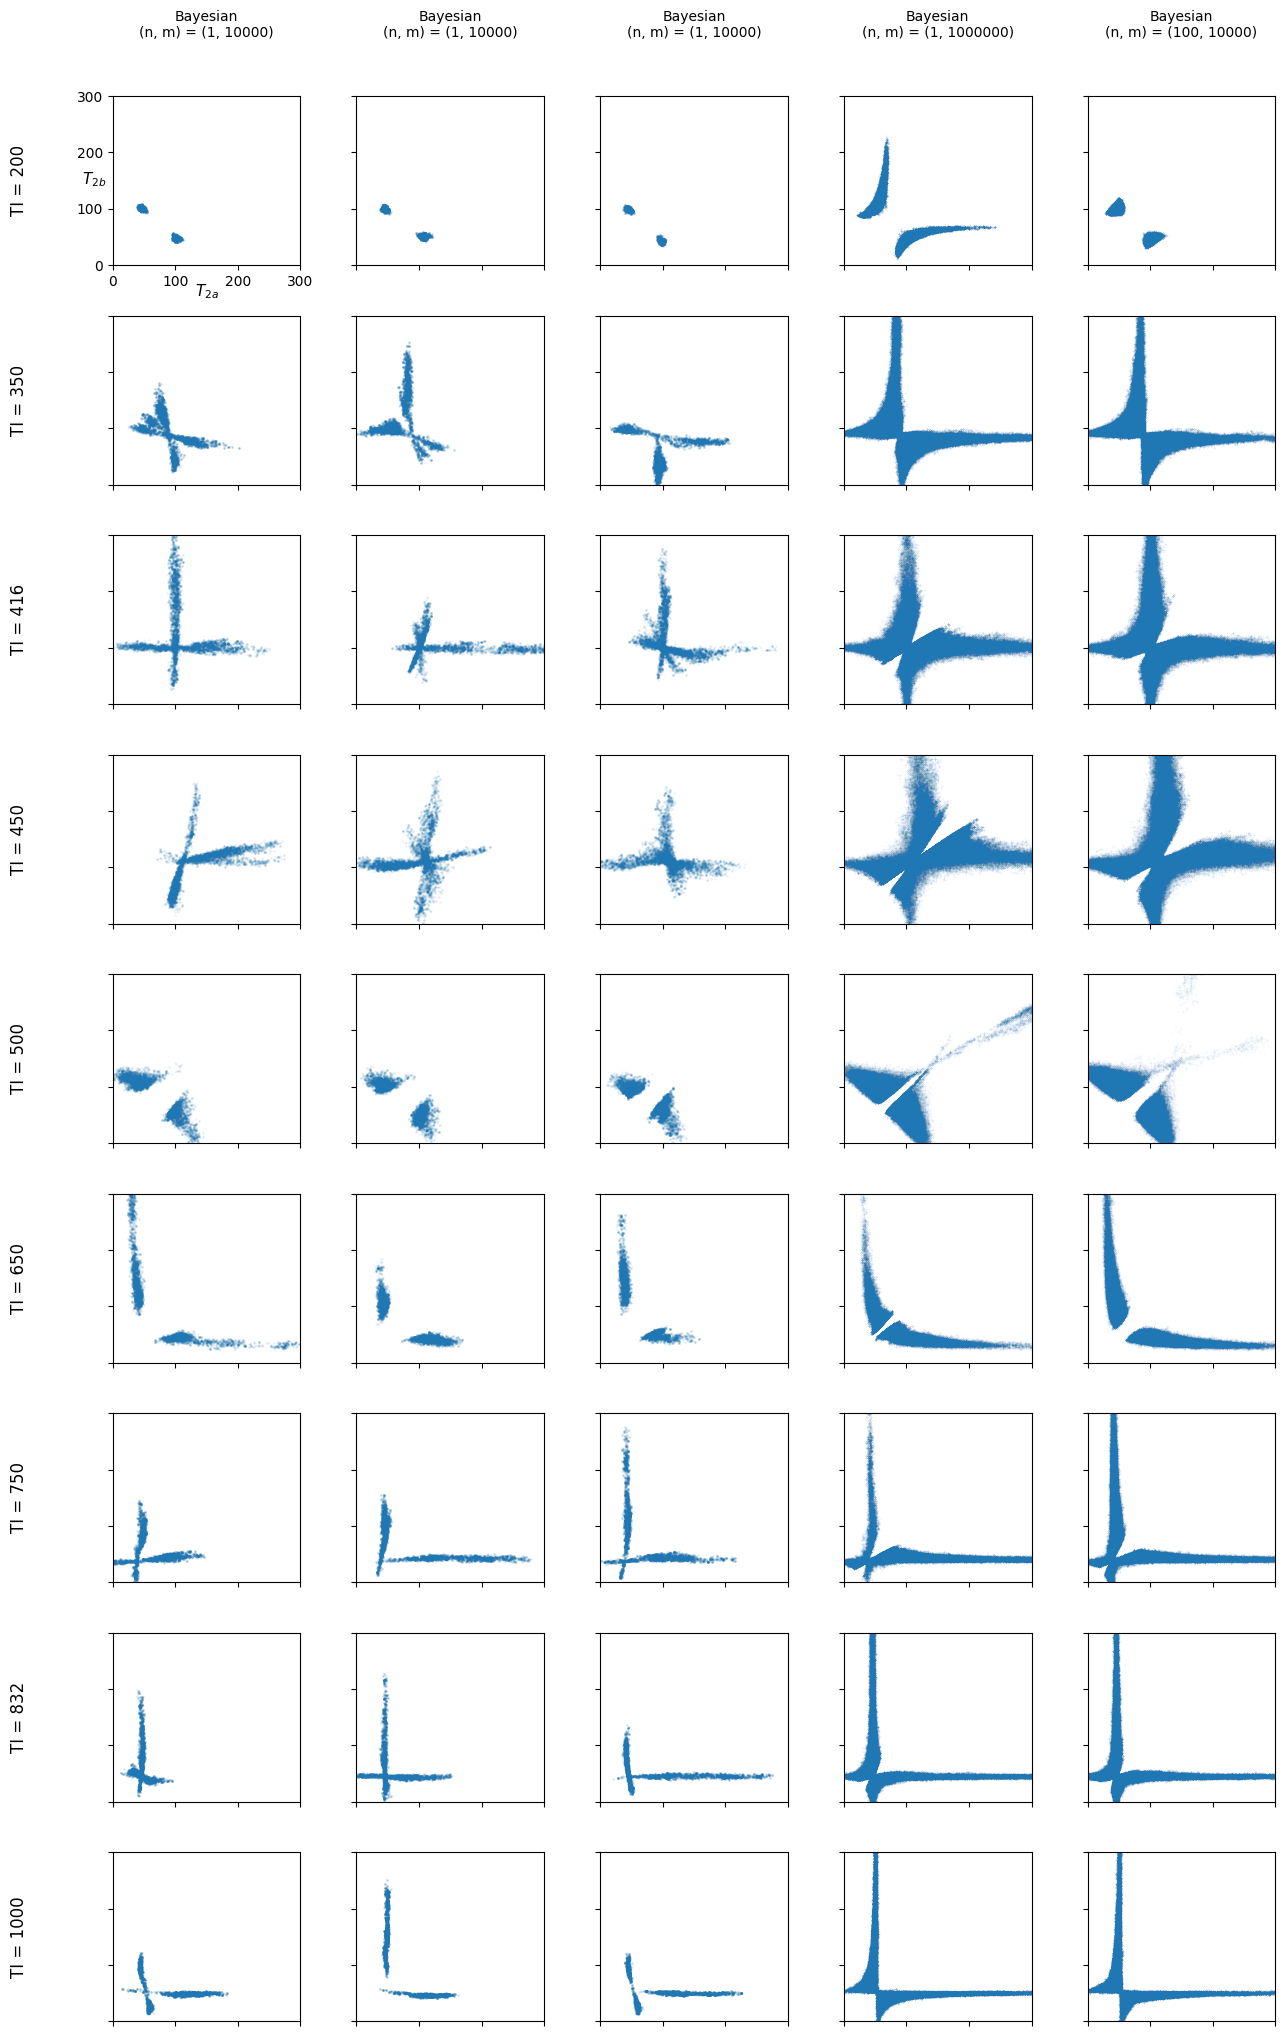

In [6]:
create_huge_figure()

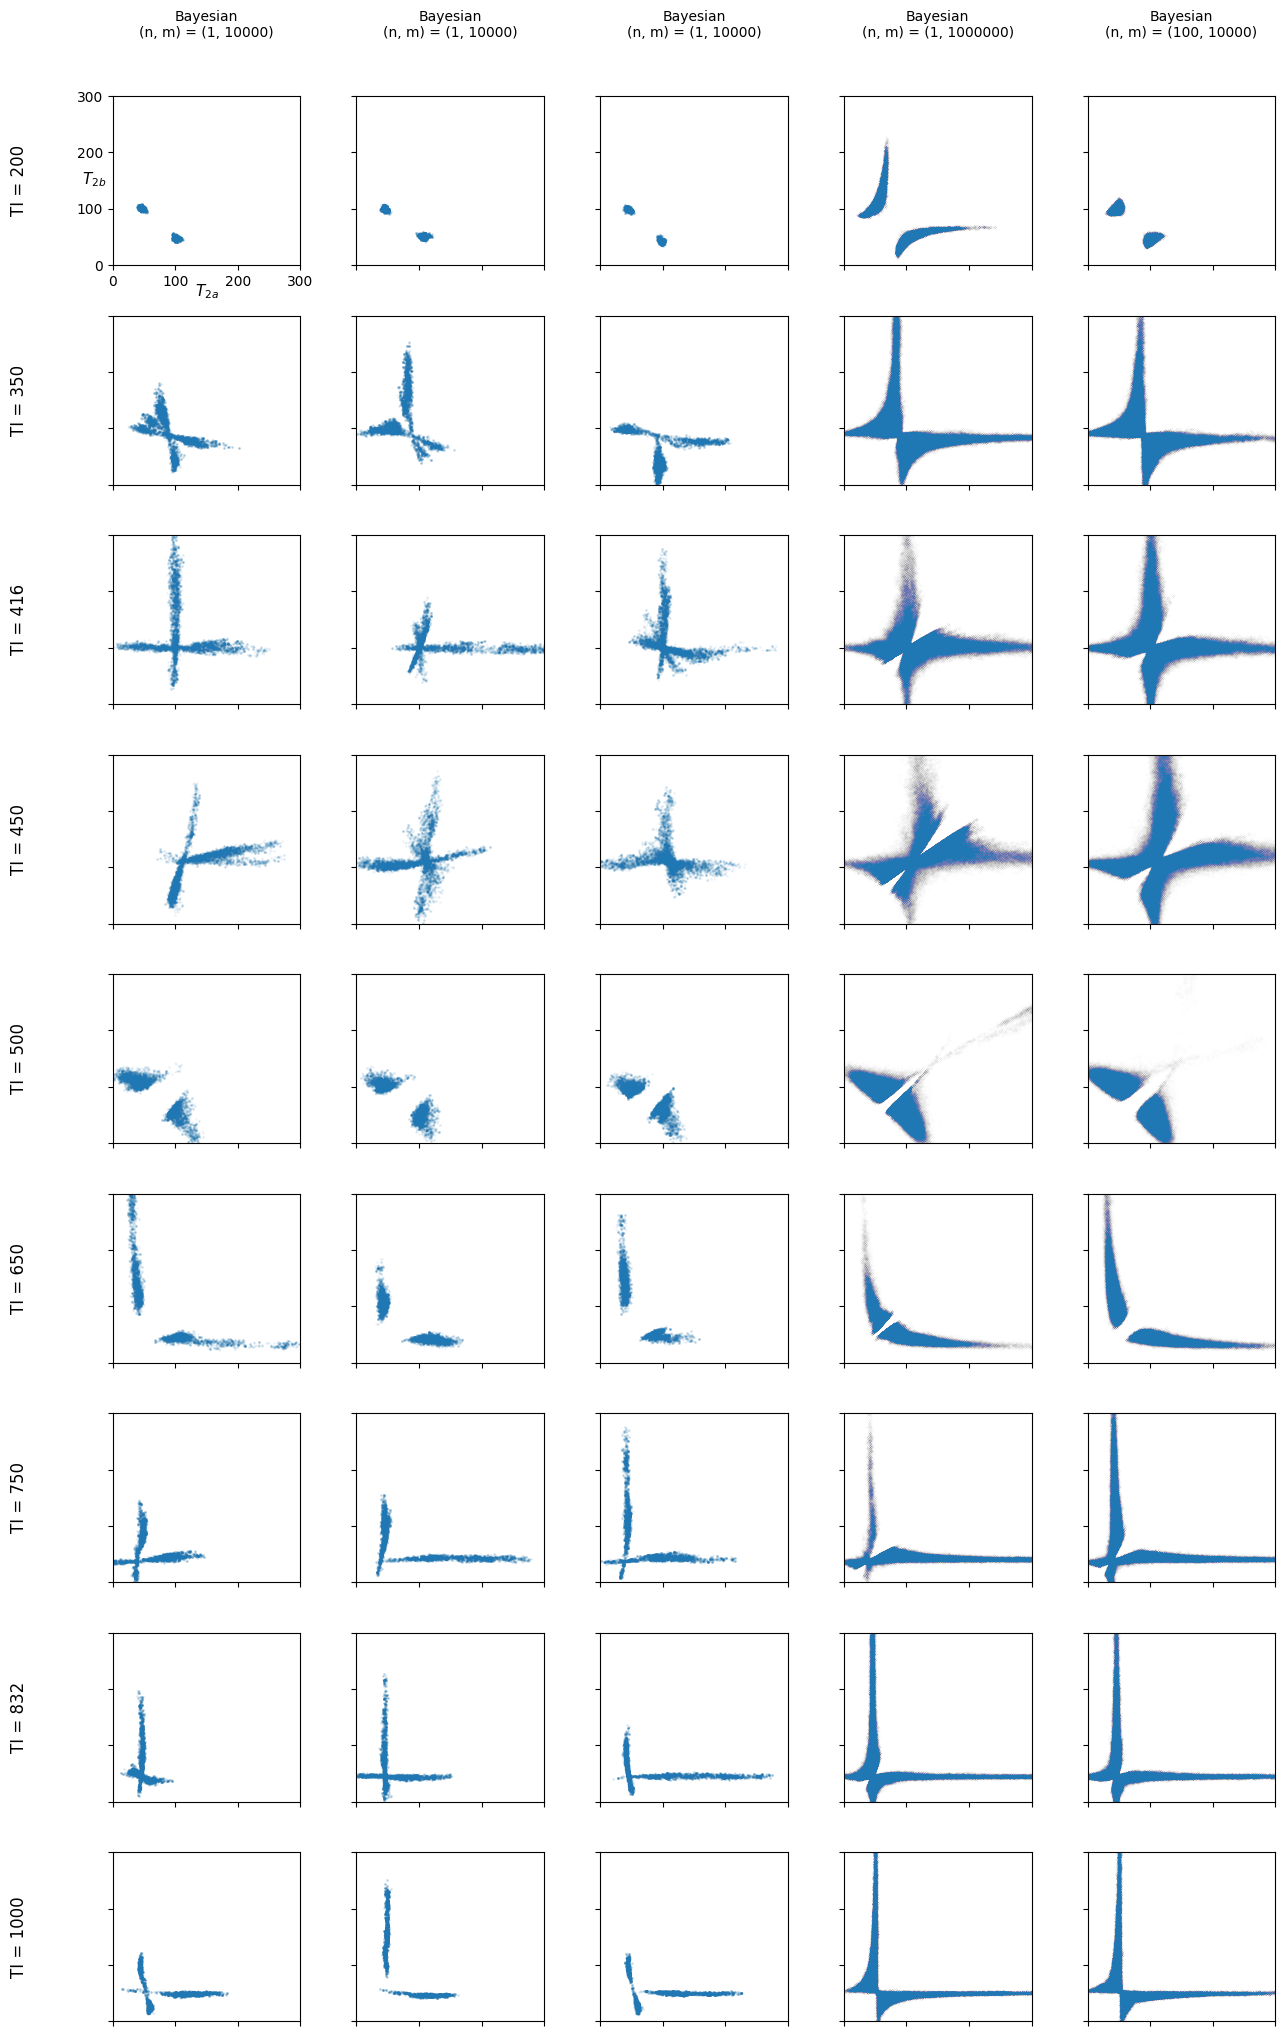

In [7]:
create_huge_figure("results/plot4.png", 500, small_point = 0.01)